In [1]:
##===========================================================================##
## modules
##===========================================================================##
from numpy import pi, log10, sqrt, array, exp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##===========================================================================##
## constants
##===========================================================================##
A = 1 # Pa*m, amplitude
rho = 1.225 # kg/m3 , density of air at standard conditions
c = 343 # m/s, speed of sound in air at standard conditions
r = np.linspace(0.01, 10, 1000) #m, radius from source
r = np.reshape(r, (len(r),1))
Iref = 10E-12 # W/m2, reference intensity (1 pico W/m2)


[5.46]
[0.55]
[0.05]


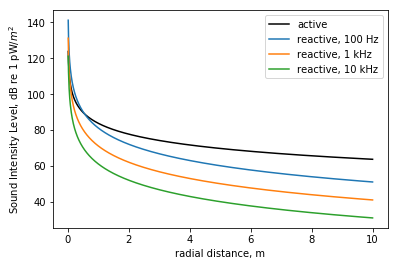

In [4]:
##===========================================================================##
## intensity, plot
##===========================================================================##
f = array([100, 1000, 10000], ndmin=2) # Hz, frequency
w = 2*pi*f # radians, angular frequency
k = w/c # 1/m wavenumber

Ia = A**2/(rho*c*r**2)
Ir = A**2/(rho*c*k*r**3)

Lia = np.reshape(10*log10(Ia/Iref), len(r))
Lir0 = 10*log10(Ir[:,0]/Iref)
Lir1 = 10*log10(Ir[:,1]/Iref)
Lir2 = 10*log10(Ir[:,2]/Iref)

fig, ax1 = plt.subplots()
ax1.plot(r, Lia, 'k', label='active')
ax1.plot(r, Lir0, label='reactive, 100 Hz')
ax1.plot(r, Lir1, label='reactive, 1 kHz')
ax1.plot(r, Lir2, label='reactive, 10 kHz')

#ax1.set_xscale('log')
ax1.legend()
ax1.set_xlabel('radial distance, m')
ax1.set_ylabel('Sound Intensity Level, dB re 1 pW/$m^2$')

### distance at which reactive intensity is 10 dB lower that active intensity
print(r[np.argmin(abs(Lia - Lir0 - 10))])
print(r[np.argmin(abs(Lia - Lir1 - 10))])
print(r[np.argmin(abs(Lia - Lir2 - 10))])

### n wavelength at which reactive intensity is 10 dB lower that active intensity (1.6*2*pi=10)
#print(r[np.argmin(abs(Lia - Lir0 - 10))]/(c/100))
#print(r[np.argmin(abs(Lia - Lir1 - 10))]/(c/1000))
#print(r[np.argmin(abs(Lia - Lir2 - 10))]/(c/10000))